<a href="https://colab.research.google.com/github/hbisgin/datamining/blob/main/train_test_split_crossval_roc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train-Test Split, Cross-Validation, and ROC Curve

This notebook will demonstrate:
- How to **split data** into training and testing sets using `train_test_split`
- How to perform **cross-validation** to evaluate model performance
- How to **plot an ROC curve** to assess classification performance

We will use the **Breast Cancer dataset** from `sklearn.datasets`.


In [1]:
%pip install seaborn scikit-learn matplotlib numpy pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Set style
sns.set_style("whitegrid")


In [3]:
# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

# Display first few rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 455
Testing set size: 114


In [5]:
# Perform 5-fold cross-validation with Logistic Regression
model = LogisticRegression(max_iter=10000)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.96703297 0.92307692 0.94505495 0.95604396 0.93406593]
Mean accuracy: 0.945054945054945


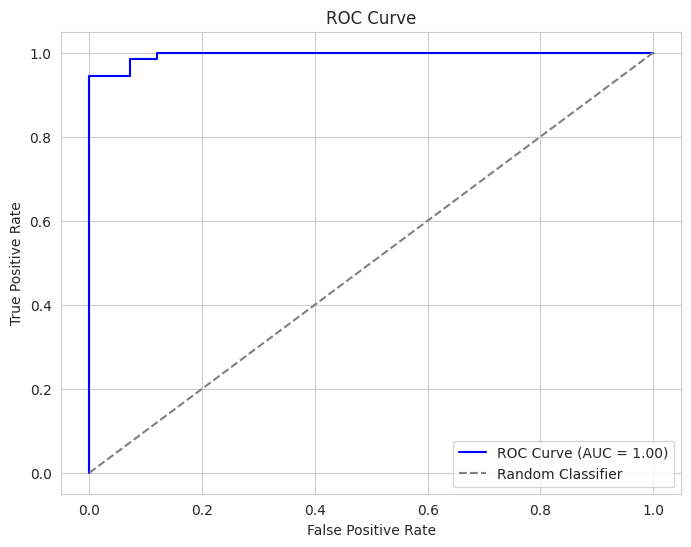

[[1.00000000e+00 3.36832362e-11]
 [3.58738923e-05 9.99964126e-01]
 [9.48954445e-01 5.10455552e-02]
 [3.95613551e-01 6.04386449e-01]
 [9.99999998e-01 2.01384297e-09]
 [1.75262332e-02 9.82473767e-01]
 [3.06745435e-05 9.99969325e-01]
 [9.99990064e-01 9.93618234e-06]
 [9.99950810e-01 4.91896837e-05]
 [1.00000000e+00 1.46649093e-10]
 [1.38631287e-03 9.98613687e-01]
 [9.95042452e-01 4.95754809e-03]
 [9.07945408e-04 9.99092055e-01]
 [9.99988878e-01 1.11216716e-05]
 [9.99424114e-01 5.75885895e-04]
 [6.08264431e-02 9.39173557e-01]
 [7.79279620e-01 2.20720380e-01]
 [2.15008079e-02 9.78499192e-01]
 [1.45467511e-03 9.98545325e-01]
 [2.08079334e-02 9.79192067e-01]
 [9.96077537e-01 3.92246277e-03]
 [9.87573474e-01 1.24265260e-02]
 [3.49025498e-04 9.99650975e-01]
 [7.67266395e-04 9.99232734e-01]
 [2.90779721e-02 9.70922028e-01]
 [6.44412204e-02 9.35558780e-01]
 [1.00000000e+00 4.28326620e-13]
 [5.57603444e-03 9.94423966e-01]
 [1.52175191e-03 9.98478248e-01]
 [3.39558119e-03 9.96604419e-01]
 [3.479301

In [6]:
# Fit model and get probabilities
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]#we're only interested in the probabilities for the positive class. Therefore, skip column 0

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(model.predict_proba(X_test))

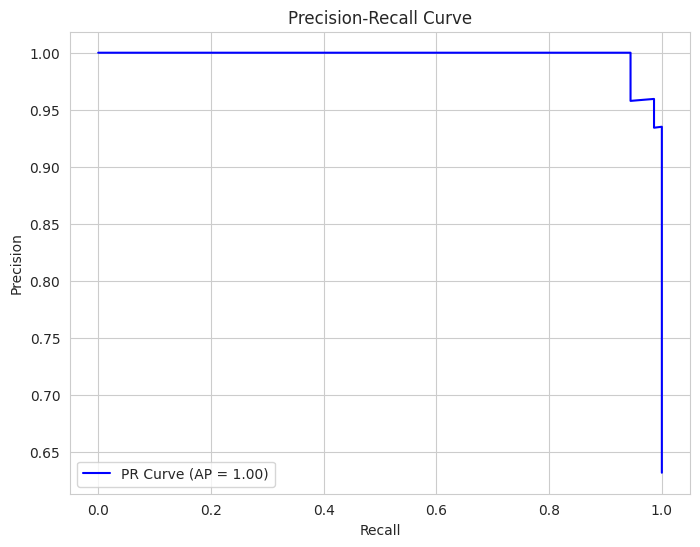

In [7]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute Average Precision (AP) Score
ap_score = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f"PR Curve (AP = {ap_score:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

## ✨ Lab questions

Try the following exercises to reinforce your learning:

1. Modify the `train_test_split` function to use **30% test data** instead of 20%.  
2. Change the classifier to **Support Vector Macines** and compare its ROC curve with Logistic Regression.  You can try different C values and vary your kernel functions. Please note that different kernel functions come with different parameters which you may want to change, too
3. Compute and visualize the **Precision-Recall Curve** in addition to the ROC curve.  (optional)


In [8]:
# Split data into 80% training and 20% testing
X30_train, X30_test, y30_train, y30_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set size:", X30_train.shape[0])
print("Testing set size:", X30_test.shape[0])

Training set size: 398
Testing set size: 171


1000.0 1e-05 0.9239766081871345


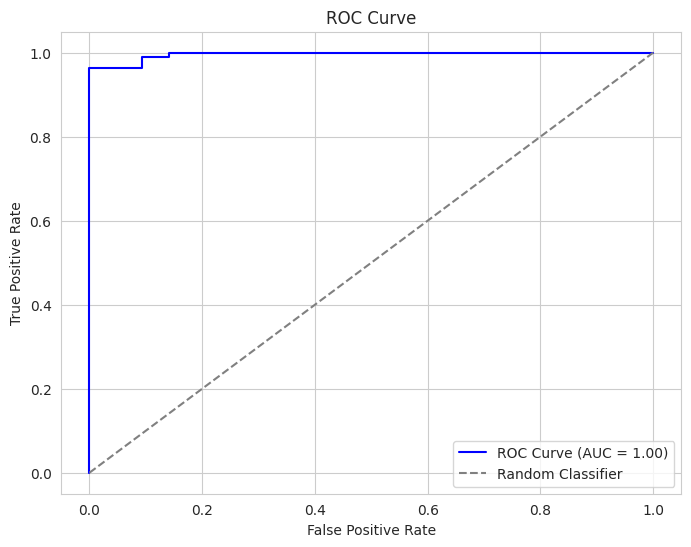

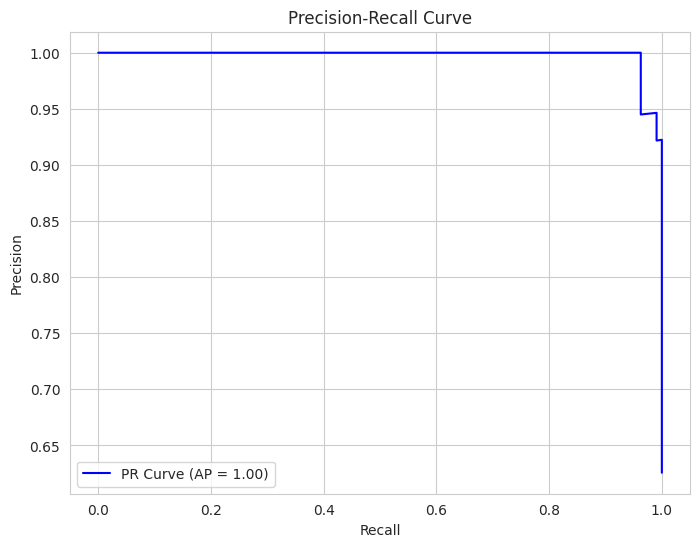

[[4.62717753e-01 5.37282247e-01]
 [1.02126690e-02 9.89787331e-01]
 [3.34920174e-07 9.99999665e-01]
 [9.99583741e-01 4.16259271e-04]
 [2.88216646e-01 7.11783354e-01]
 [8.06314765e-01 1.93685235e-01]
 [1.02950767e-06 9.99998970e-01]
 [9.99804125e-01 1.95875427e-04]
 [1.84292718e-06 9.99998157e-01]
 [9.99541764e-01 4.58235750e-04]
 [7.66738168e-06 9.99992333e-01]
 [5.75894247e-06 9.99994241e-01]
 [8.94989622e-01 1.05010378e-01]
 [4.42953282e-01 5.57046718e-01]
 [5.12319785e-06 9.99994877e-01]
 [7.82639065e-01 2.17360935e-01]
 [9.99962603e-01 3.73968077e-05]
 [1.97176123e-01 8.02823877e-01]
 [1.49924539e-05 9.99985008e-01]
 [8.25291722e-02 9.17470828e-01]
 [2.81585704e-03 9.97184143e-01]
 [3.52019646e-02 9.64798035e-01]
 [3.06209307e-03 9.96937907e-01]
 [9.99999900e-01 1.00000010e-07]
 [9.99916792e-01 8.32080312e-05]
 [7.73895245e-01 2.26104755e-01]
 [1.28447058e-06 9.99998716e-01]
 [1.60603242e-01 8.39396758e-01]
 [5.77127860e-01 4.22872140e-01]
 [9.99951304e-01 4.86957493e-05]
 [1.751718

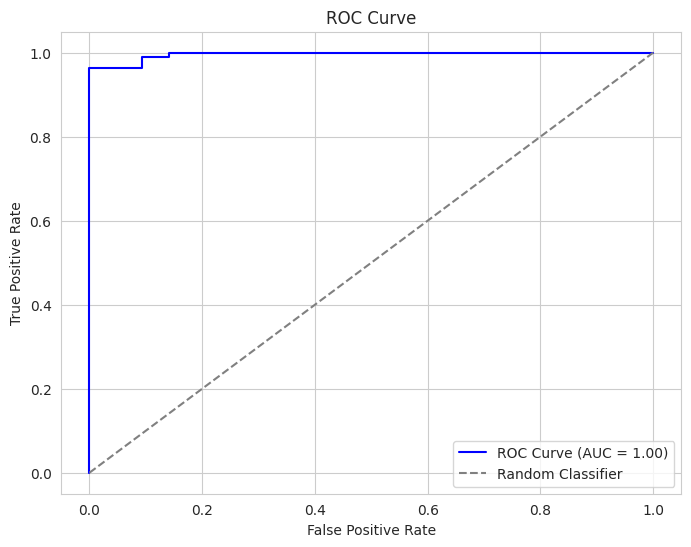

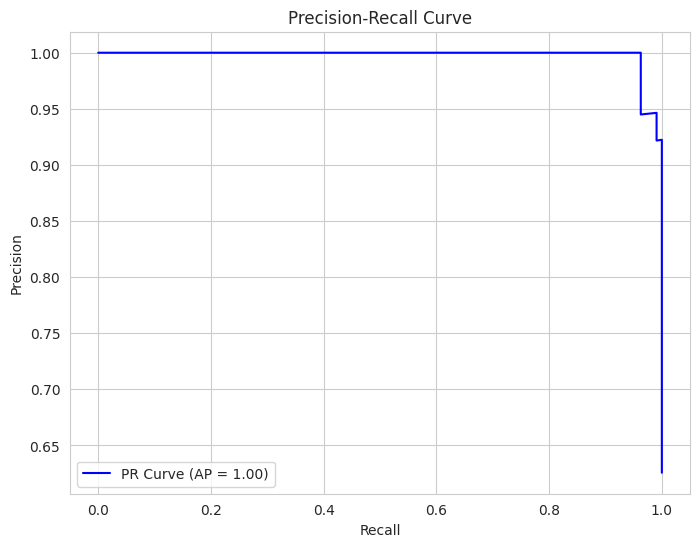

[[3.63181796e-01 6.36818204e-01]
 [7.35310706e-03 9.92646893e-01]
 [4.10882018e-07 9.99999589e-01]
 [9.90493354e-01 9.50664568e-03]
 [3.13476572e-01 6.86523428e-01]
 [9.28343582e-01 7.16564183e-02]
 [1.29087005e-05 9.99987091e-01]
 [9.94301146e-01 5.69885430e-03]
 [6.30353875e-06 9.99993696e-01]
 [9.99995876e-01 4.12408941e-06]
 [1.34998818e-05 9.99986500e-01]
 [1.21872435e-02 9.87812756e-01]
 [9.99434390e-01 5.65609828e-04]
 [5.39769132e-01 4.60230868e-01]
 [1.47523976e-02 9.85247602e-01]
 [6.62476413e-01 3.37523587e-01]
 [9.49341734e-01 5.06582657e-02]
 [1.48618738e-02 9.85138126e-01]
 [9.39246339e-03 9.90607537e-01]
 [5.65963365e-02 9.43403664e-01]
 [6.96416815e-03 9.93035832e-01]
 [6.35108872e-02 9.36489113e-01]
 [3.03616849e-02 9.69638315e-01]
 [9.98516108e-01 1.48389159e-03]
 [9.99369609e-01 6.30391183e-04]
 [3.63305509e-01 6.36694491e-01]
 [8.14047496e-06 9.99991860e-01]
 [1.97589564e-01 8.02410436e-01]
 [7.14397355e-01 2.85602645e-01]
 [9.57497428e-01 4.25025718e-02]
 [8.979883

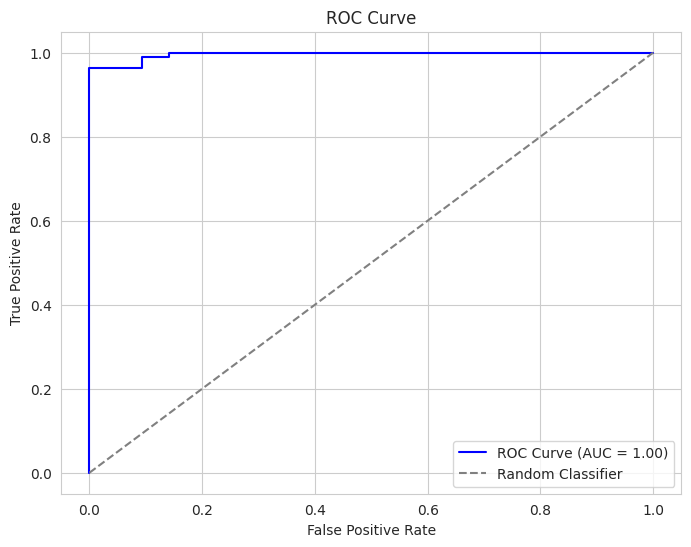

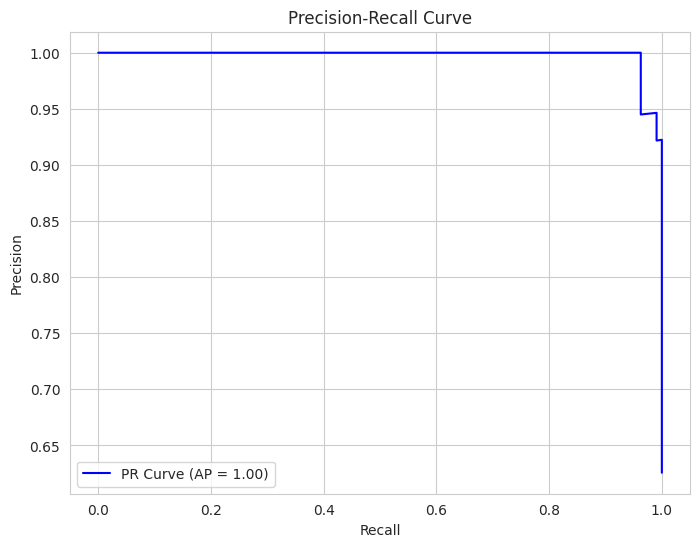

[[1.12313443e-01 8.87686557e-01]
 [3.23503404e-02 9.67649660e-01]
 [7.56253030e-03 9.92437470e-01]
 [9.82837981e-01 1.71620188e-02]
 [2.31688971e-01 7.68311029e-01]
 [5.18136471e-01 4.81863529e-01]
 [1.42588945e-02 9.85741105e-01]
 [9.93947747e-01 6.05225314e-03]
 [1.13654346e-02 9.88634565e-01]
 [9.99999900e-01 1.00000010e-07]
 [1.56208813e-02 9.84379119e-01]
 [3.39567806e-02 9.66043219e-01]
 [9.92958343e-01 7.04165739e-03]
 [5.00000000e-01 5.00000000e-01]
 [4.98473699e-02 9.50152630e-01]
 [8.19950685e-01 1.80049315e-01]
 [9.99988509e-01 1.14909006e-05]
 [2.67196904e-02 9.73280310e-01]
 [2.95632689e-02 9.70436731e-01]
 [6.35528814e-02 9.36447119e-01]
 [2.09108335e-02 9.79089167e-01]
 [8.58120166e-02 9.14187983e-01]
 [4.41430825e-02 9.55856918e-01]
 [9.99944733e-01 5.52672294e-05]
 [9.99999900e-01 1.00000010e-07]
 [3.14959194e-01 6.85040806e-01]
 [1.02043787e-02 9.89795621e-01]
 [2.53323932e-01 7.46676068e-01]
 [6.39316125e-01 3.60683875e-01]
 [9.99959342e-01 4.06584418e-05]
 [1.056582

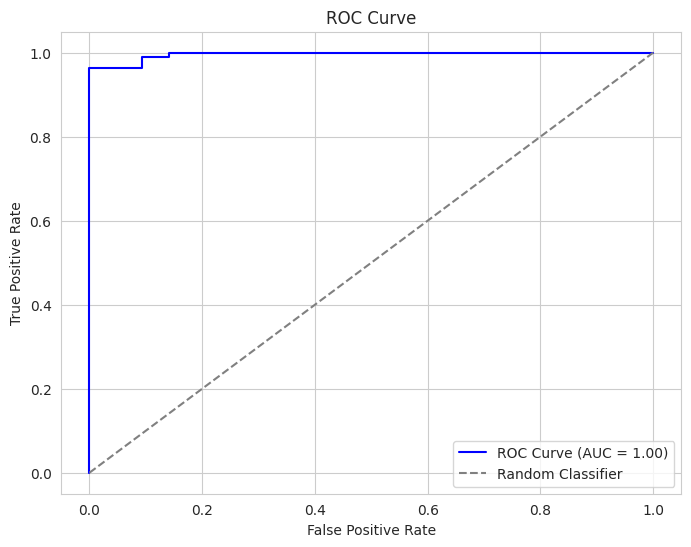

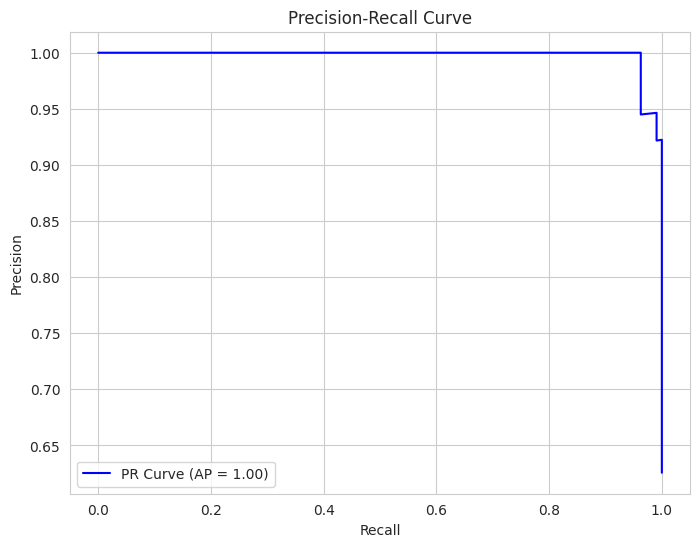

[[3.89003627e-01 6.10996373e-01]
 [1.48722120e-02 9.85127788e-01]
 [8.89884294e-07 9.99999110e-01]
 [9.99817319e-01 1.82680594e-04]
 [2.10860332e-01 7.89139668e-01]
 [8.55011640e-01 1.44988360e-01]
 [9.59375878e-13 1.00000000e+00]
 [9.99997181e-01 2.81873149e-06]
 [1.63028633e-05 9.99983697e-01]
 [9.99903350e-01 9.66503764e-05]
 [4.69191665e-07 9.99999531e-01]
 [3.02955224e-03 9.96970448e-01]
 [9.70768454e-01 2.92315455e-02]
 [4.89281523e-01 5.10718477e-01]
 [5.63178031e-12 1.00000000e+00]
 [7.75957813e-01 2.24042187e-01]
 [9.99999350e-01 6.49511455e-07]
 [2.21468934e-01 7.78531066e-01]
 [1.35177705e-12 1.00000000e+00]
 [2.02564411e-02 9.79743559e-01]
 [5.65650378e-03 9.94343496e-01]
 [1.10843223e-01 8.89156777e-01]
 [3.19409445e-07 9.99999681e-01]
 [9.99999900e-01 1.00000010e-07]
 [9.99995293e-01 4.70741615e-06]
 [4.82314550e-01 5.17685450e-01]
 [3.77372080e-03 9.96226279e-01]
 [1.46706972e-01 8.53293028e-01]
 [8.94858155e-01 1.05141845e-01]
 [9.99999650e-01 3.50279376e-07]
 [1.616939

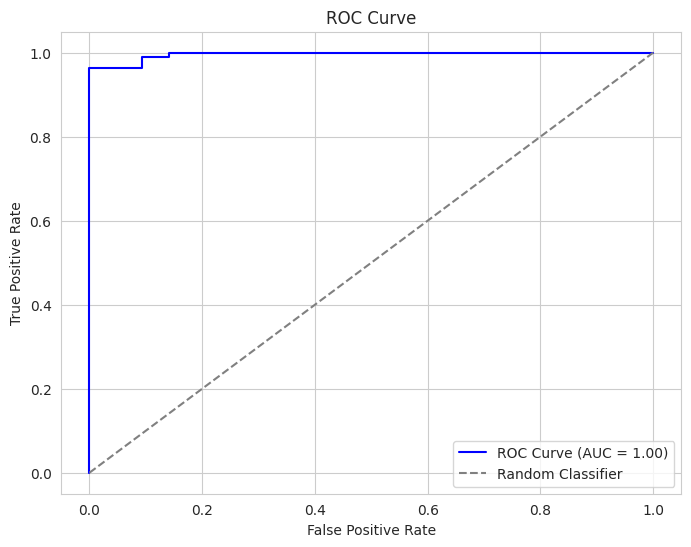

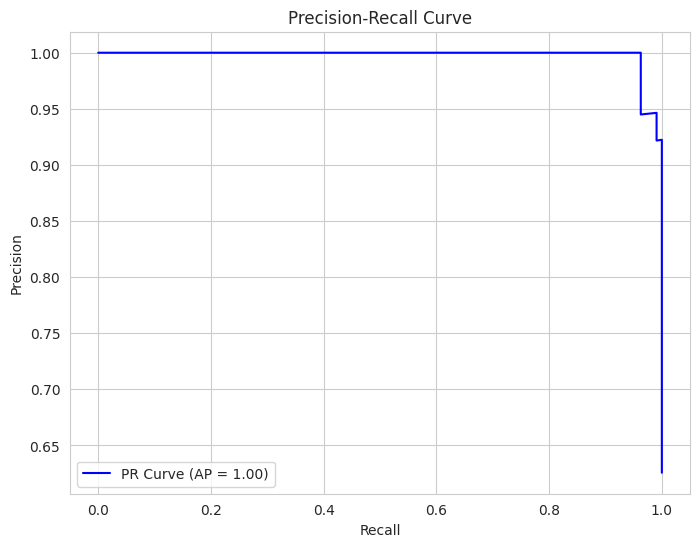

[[5.46780951e-01 4.53219049e-01]
 [1.53371497e-02 9.84662850e-01]
 [2.71218396e-03 9.97287816e-01]
 [9.97632291e-01 2.36770896e-03]
 [2.66149928e-01 7.33850072e-01]
 [9.48707897e-01 5.12921025e-02]
 [5.06157388e-03 9.94938426e-01]
 [9.98952011e-01 1.04798866e-03]
 [5.70126147e-03 9.94298739e-01]
 [9.99999900e-01 1.00000010e-07]
 [8.56306752e-03 9.91436932e-01]
 [1.52813485e-02 9.84718652e-01]
 [9.99672425e-01 3.27575469e-04]
 [5.61133438e-01 4.38866562e-01]
 [7.68665536e-03 9.92313345e-01]
 [5.74382636e-01 4.25617364e-01]
 [9.99840730e-01 1.59269973e-04]
 [6.25575044e-02 9.37442496e-01]
 [2.45258229e-02 9.75474177e-01]
 [1.00030875e-01 8.99969125e-01]
 [1.21369281e-02 9.87863072e-01]
 [6.55833404e-02 9.34416660e-01]
 [4.07602273e-02 9.59239773e-01]
 [9.99995793e-01 4.20687456e-06]
 [9.99999900e-01 1.00000010e-07]
 [4.41392030e-01 5.58607970e-01]
 [4.95476750e-03 9.95045232e-01]
 [1.57304796e-01 8.42695204e-01]
 [7.16958656e-01 2.83041344e-01]
 [9.99590359e-01 4.09641464e-04]
 [1.652665

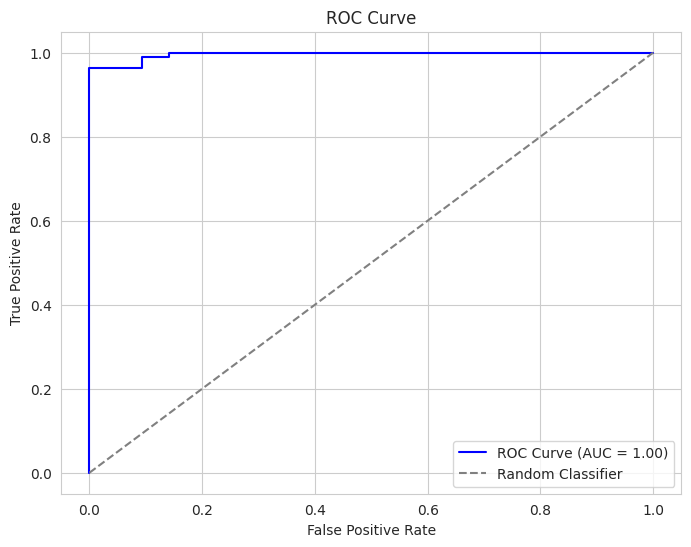

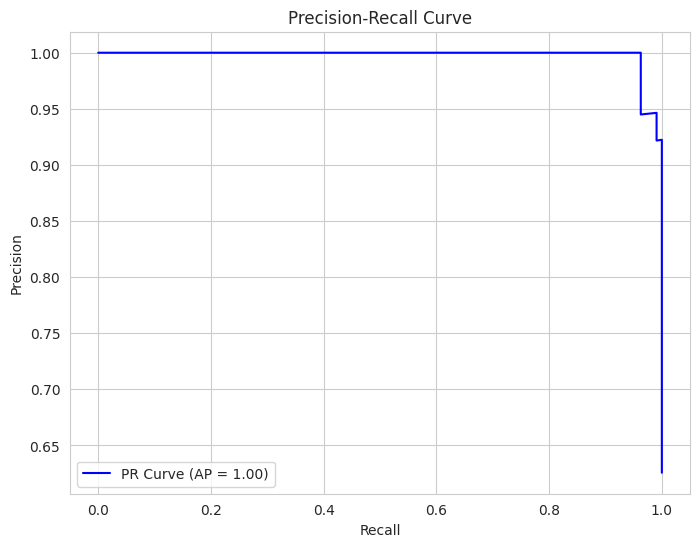

[[4.37904474e-01 5.62095526e-01]
 [1.53747530e-02 9.84625247e-01]
 [4.18902191e-06 9.99995811e-01]
 [9.99526094e-01 4.73905595e-04]
 [3.64881303e-01 6.35118697e-01]
 [8.97326676e-01 1.02673324e-01]
 [4.92836529e-06 9.99995072e-01]
 [9.94036651e-01 5.96334914e-03]
 [2.68524318e-03 9.97314757e-01]
 [9.99999900e-01 1.00000010e-07]
 [2.65829412e-03 9.97341706e-01]
 [2.04921233e-02 9.79507877e-01]
 [9.98579864e-01 1.42013604e-03]
 [5.41867666e-01 4.58132334e-01]
 [2.86220067e-02 9.71377993e-01]
 [7.32084618e-01 2.67915382e-01]
 [9.99727556e-01 2.72444110e-04]
 [2.41011058e-02 9.75898894e-01]
 [1.01356627e-02 9.89864337e-01]
 [7.10993889e-02 9.28900611e-01]
 [1.41461912e-02 9.85853809e-01]
 [8.14160749e-02 9.18583925e-01]
 [5.05298874e-02 9.49470113e-01]
 [9.99856862e-01 1.43138033e-04]
 [9.99993265e-01 6.73451421e-06]
 [3.19807408e-01 6.80192592e-01]
 [3.20302736e-03 9.96796973e-01]
 [1.98481994e-01 8.01518006e-01]
 [8.29815705e-01 1.70184295e-01]
 [9.99580898e-01 4.19101585e-04]
 [9.048340

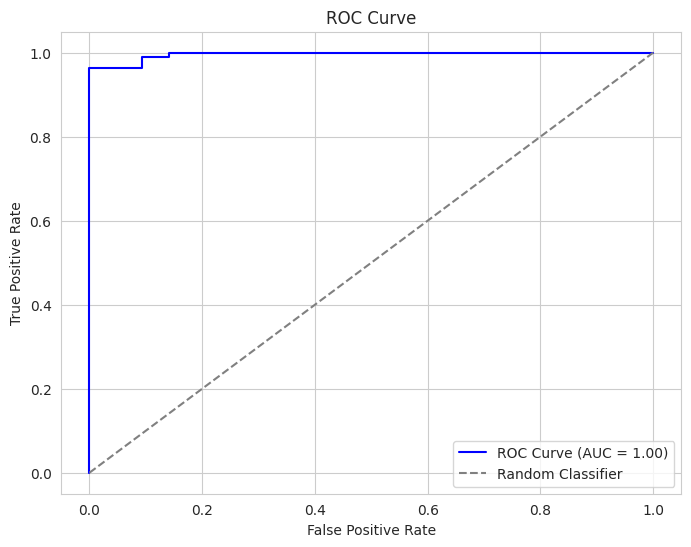

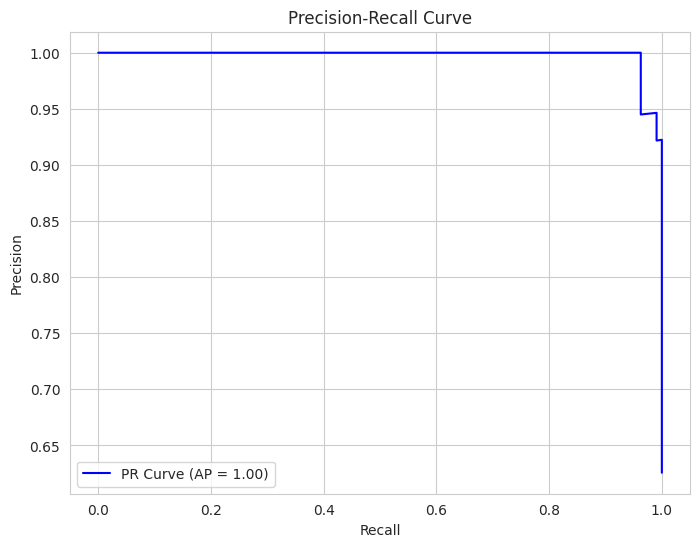

[[6.82762090e-01 3.17237910e-01]
 [6.54023857e-03 9.93459761e-01]
 [5.14183825e-03 9.94858162e-01]
 [9.95464750e-01 4.53525048e-03]
 [2.17488718e-01 7.82511282e-01]
 [7.19280391e-01 2.80719609e-01]
 [7.36074786e-11 1.00000000e+00]
 [9.99986699e-01 1.33006587e-05]
 [5.42131083e-06 9.99994579e-01]
 [9.99985296e-01 1.47040604e-05]
 [2.27698791e-06 9.99997723e-01]
 [1.76187645e-02 9.82381235e-01]
 [7.26190278e-01 2.73809722e-01]
 [6.02909938e-01 3.97090062e-01]
 [8.00397214e-09 9.99999992e-01]
 [7.24102075e-01 2.75897925e-01]
 [9.99995583e-01 4.41703227e-06]
 [7.99209792e-02 9.20079021e-01]
 [4.13548189e-10 1.00000000e+00]
 [1.41324709e-02 9.85867529e-01]
 [4.78834500e-03 9.95211655e-01]
 [1.94742865e-01 8.05257135e-01]
 [6.31787105e-06 9.99993682e-01]
 [9.99999900e-01 1.00000010e-07]
 [9.99996195e-01 3.80539208e-06]
 [3.94338549e-01 6.05661451e-01]
 [5.10719820e-03 9.94892802e-01]
 [2.32980724e-01 7.67019276e-01]
 [8.83970359e-01 1.16029641e-01]
 [9.99993365e-01 6.63500730e-06]
 [1.225884

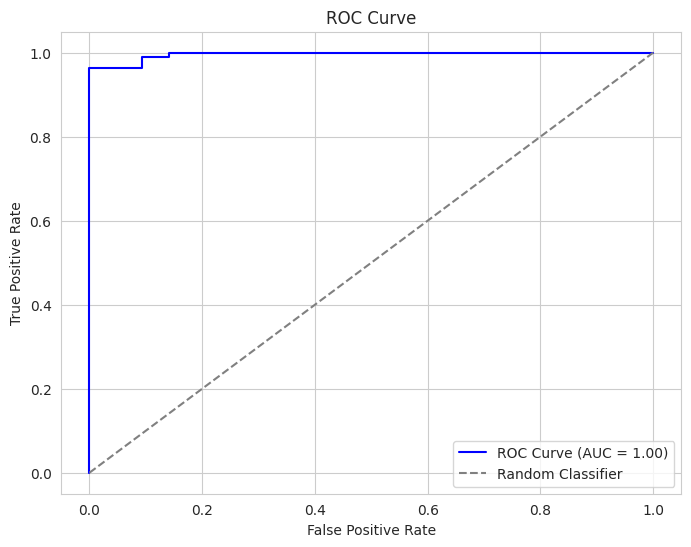

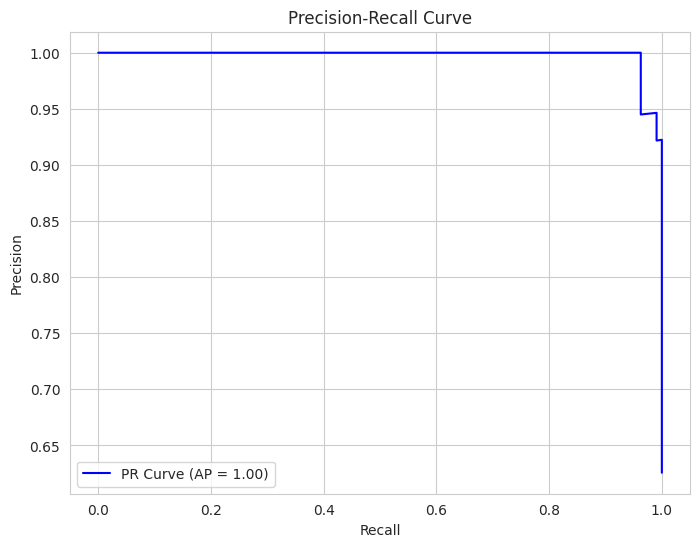

[[6.18694370e-01 3.81305630e-01]
 [6.58772049e-02 9.34122795e-01]
 [1.88783393e-02 9.81121661e-01]
 [9.96980084e-01 3.01991551e-03]
 [2.70003110e-01 7.29996890e-01]
 [9.25622388e-01 7.43776123e-02]
 [1.22329858e-05 9.99987767e-01]
 [9.81877959e-01 1.81220412e-02]
 [2.84352735e-02 9.71564726e-01]
 [9.99999900e-01 1.00000010e-07]
 [2.19135778e-02 9.78086422e-01]
 [3.44801655e-02 9.65519835e-01]
 [9.35960622e-01 6.40393784e-02]
 [5.10583296e-01 4.89416704e-01]
 [9.01592174e-06 9.99990984e-01]
 [5.40329020e-01 4.59670980e-01]
 [9.99997788e-01 2.21187797e-06]
 [2.41670005e-01 7.58329995e-01]
 [2.96364618e-03 9.97036354e-01]
 [1.38585552e-01 8.61414448e-01]
 [2.64190317e-02 9.73580968e-01]
 [1.49262414e-01 8.50737586e-01]
 [3.60989004e-02 9.63901100e-01]
 [9.99982472e-01 1.75282578e-05]
 [9.99999900e-01 1.00000010e-07]
 [5.32772721e-01 4.67227279e-01]
 [1.59986190e-02 9.84001381e-01]
 [2.05054832e-01 7.94945168e-01]
 [7.98913699e-01 2.01086301e-01]
 [9.99989087e-01 1.09134630e-05]
 [3.359801

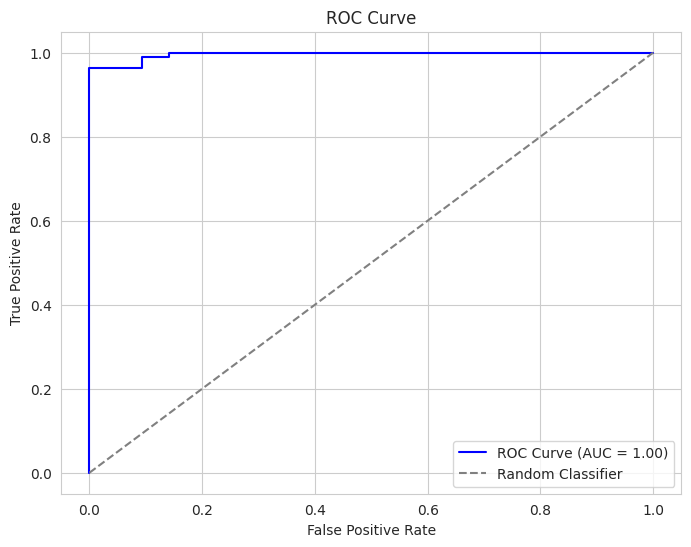

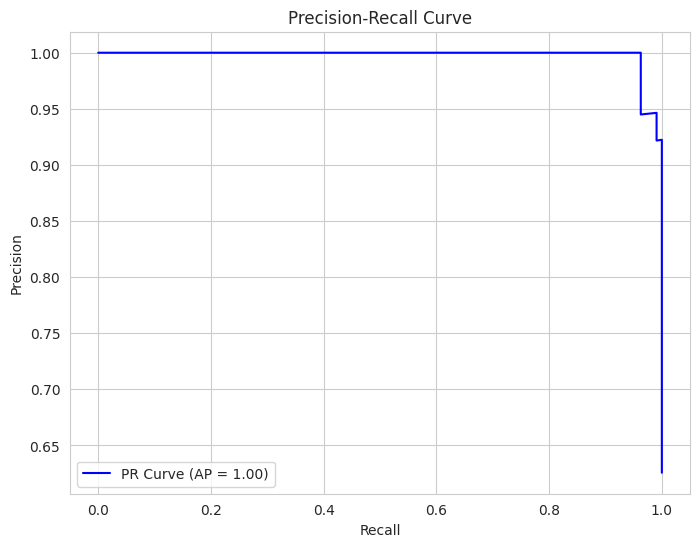

[[6.56972687e-01 3.43027313e-01]
 [8.47719211e-03 9.91522808e-01]
 [2.42672047e-07 9.99999757e-01]
 [9.99790927e-01 2.09072816e-04]
 [3.14610858e-01 6.85389142e-01]
 [9.64812660e-01 3.51873401e-02]
 [1.66173443e-06 9.99998338e-01]
 [9.97851012e-01 2.14898833e-03]
 [8.90854206e-06 9.99991091e-01]
 [9.99999847e-01 1.53495779e-07]
 [2.84742127e-06 9.99997153e-01]
 [1.19698631e-02 9.88030137e-01]
 [9.99713882e-01 2.86117645e-04]
 [5.92009079e-01 4.07990921e-01]
 [1.34760156e-02 9.86523984e-01]
 [6.15387888e-01 3.84612112e-01]
 [9.48231502e-01 5.17684981e-02]
 [3.51621479e-02 9.64837852e-01]
 [1.10870153e-02 9.88912985e-01]
 [5.11337213e-02 9.48866279e-01]
 [7.82091162e-03 9.92179088e-01]
 [7.68562803e-02 9.23143720e-01]
 [3.30328186e-02 9.66967181e-01]
 [9.99757835e-01 2.42165009e-04]
 [9.99417193e-01 5.82806524e-04]
 [3.86638964e-01 6.13361036e-01]
 [1.05446169e-05 9.99989455e-01]
 [1.50733195e-01 8.49266805e-01]
 [8.59290219e-01 1.40709781e-01]
 [9.82349506e-01 1.76504936e-02]
 [1.240739

In [15]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
C=[1e+03, 1e+04, 1e+05]
gamma=[1e-05, 1e-06, 1e-07]
for c in C:
  for g in gamma:
    clf = svm.SVC(C=c, gamma=g, kernel='rbf', probability=True)
    clf.fit(X30_train, y30_train)
    y_pred = clf.predict(X30_test)
    tn, fp, fn, tp = confusion_matrix(y30_test, y_pred).ravel()
    print(c, g, (tp+tn)/(tp+tn+fp+fn))
    clf.fit(X30_train, y30_train)
    y_scores = model.predict_proba(X30_test)[:, 1]#we're only interested in the probabilities for the positive class. Therefore, skip column 0

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y30_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    
    precision, recall, _ = precision_recall_curve(y30_test, y_scores)

    # Compute Average Precision (AP) Score
    ap_score = average_precision_score(y30_test, y_scores)

    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', label=f"PR Curve (AP = {ap_score:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.show()

    print(clf.predict_proba(X30_test))